In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import pandas as pd
import networkx as nx
import tensorflow as tf
import numpy as np
from utils import predict

In [2]:
species_features_dummy = pd.read_csv("./data/species_features.csv.gz", index_col=0)
molecule_features_dummy = pd.read_csv("./data/molecule_features.csv.gz", index_col=0).astype("int8")
df_agg = pd.read_csv("./data/lotus_agg_test.csv.gz", index_col=0)

In [3]:
g_train = nx.read_graphml("./graph/train_graph.gml")
g = nx.read_graphml("./graph/test_graph.gml")
g  = nx.create_empty_copy(g)
g_merged = nx.compose(g_train, g)

In [4]:
df_agg_train = pd.read_csv("./data/lotus_agg_train.csv.gz", index_col=0)

In [5]:
species_feat = species_features_dummy[species_features_dummy.index.isin(df_agg.organism_name)]
molecule_feat = molecule_features_dummy[molecule_features_dummy.index.isin(df_agg.structure_smiles_2D)]

In [6]:
species_unique_to_test_set = df_agg[~df_agg.organism_name.isin(df_agg_train.organism_name)]
molecules_unique_to_test_set = df_agg[~df_agg.structure_smiles_2D.isin(df_agg_train.structure_smiles_2D)]

In [7]:
model_m_to_s = tf.keras.models.load_model("./model/batch_128_layer_1024_m_to_s", compile=True)
model_s_to_m = tf.keras.models.load_model("./model/batch_128_layer_1024_s_to_m", compile=True)

In [8]:
data = pd.DataFrame(df_agg[['structure_smiles_2D', 'organism_name']].to_numpy(),
                    columns=['molecule', 'species'])

In [9]:
#out = predict(g_train, model_m_to_s, model_s_to_m, data, molecule_features_dummy, species_features_dummy)

In [10]:
import matplotlib.pyplot as plt
plt.hist(out.prob)

NameError: name 'out' is not defined

In [ ]:
sum(out.prob>0.5)/len(out)

In [ ]:
out[out.model!='both_known']

In [ ]:
data_2 = pd.DataFrame(
    molecules_unique_to_test_set[['organism_name', 'structure_smiles_2D']].values,
    columns=['species', 'molecule'])

In [ ]:
data_2

In [ ]:
out_2 = predict(g_train, model_m_to_s, model_s_to_m,
                data_2,
                molecule_features_dummy,
                species_features_dummy
               )

In [ ]:
plt.hist(out_2.prob)

In [15]:
g_test = nx.read_graphml("./graph/test_graph.gml")
g_lotus = nx.compose(g_train, g_test)

In [11]:
sku = pd.concat([df_agg, df_agg_train])

In [35]:
sp = 'Eucalyptus risdoni'
data_3 = pd.DataFrame(
    {'molecule': list(set(molecule_features_dummy.index)-set(sku[sku.organism_name==sp].structure_smiles_2D)),
     'species': sp})

In [36]:
data_3

,molecule,species
0,C=CCC1CC2(OC)CC(C(C)(C)OC)OC2=CC1=O,Eucalyptus risdoni
1,CC(C)=CCc1c(O)cc(C=Cc2cc(O)c3c(c2)CC2C(C)(CCC(...,Eucalyptus risdoni
2,CC(=O)OCC12C(OC(C)=O)C(=O)C3C(OC(C)=O)C14OC3(C...,Eucalyptus risdoni
3,CC1(C)CC2C(O)C3(O)COC4(O)C(O)C(C)(C2C1)C34,Eucalyptus risdoni
4,COC1CC(OC2C(O)CC(OC3CCC4(COC(C)=O)C(=CCC5C4CCC...,Eucalyptus risdoni
...,...,...
148158,CC1CCC2=C(C1)OC(=O)C2C,Eucalyptus risdoni
148159,OCC1OC(O)C(O)C1O,Eucalyptus risdoni
148160,O=C1OCC(Cc2ccc3c(c2)OCO3)C1Cc1cc2c(cc1OC1OC(CO...,Eucalyptus risdoni
148161,CC=CCC=CCC=CCC=CCC=CCCCCC(=O)OC,Eucalyptus risdoni


In [37]:
out_3 = predict(g_lotus, model_m_to_s, model_s_to_m,
                data_3,
                molecule_features_dummy,
                species_features_dummy
               )

Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetwrokX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184990, Edges: 876144

 Node types:
  molecule: [148190]
    Features: float32 vector, length 27
    Edge types: molecule-present_in->species
  species: [36800]
    Features: float32 vector, length 80
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [438072]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [438072]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running 'forward' predictions
145/145 [==============================] - 20s 138ms/step
Predict both : running backward prediction...
145/145 [==============================] - 19s 131ms/step


(array([3.8317e+04, 1.4179e+04, 8.8310e+03, 6.6490e+03, 5.1300e+03,
        4.2070e+03, 3.6480e+03, 3.2710e+03, 2.8850e+03, 2.5970e+03,
        2.3290e+03, 2.0540e+03, 1.9440e+03, 1.7700e+03, 1.6710e+03,
        1.5740e+03, 1.4650e+03, 1.3460e+03, 1.3510e+03, 1.2280e+03,
        1.2560e+03, 1.0890e+03, 1.0760e+03, 9.9900e+02, 9.5000e+02,
        9.2800e+02, 8.8700e+02, 8.3700e+02, 8.0800e+02, 7.3400e+02,
        7.5000e+02, 7.0400e+02, 7.0300e+02, 6.6000e+02, 6.0800e+02,
        6.4700e+02, 5.6000e+02, 5.7500e+02, 5.4500e+02, 5.6300e+02,
        5.2800e+02, 5.1000e+02, 4.7800e+02, 4.7100e+02, 4.5600e+02,
        3.9400e+02, 4.0600e+02, 3.8400e+02, 3.9000e+02, 3.7800e+02,
        3.7200e+02, 3.5200e+02, 3.8200e+02, 3.2200e+02, 3.5600e+02,
        3.3800e+02, 3.0900e+02, 3.4400e+02, 2.9400e+02, 3.0400e+02,
        2.9500e+02, 2.5500e+02, 2.7200e+02, 2.7800e+02, 2.6600e+02,
        2.5700e+02, 2.4900e+02, 2.4500e+02, 2.5900e+02, 2.2900e+02,
        2.1200e+02, 2.3800e+02, 2.4400e+02, 2.03

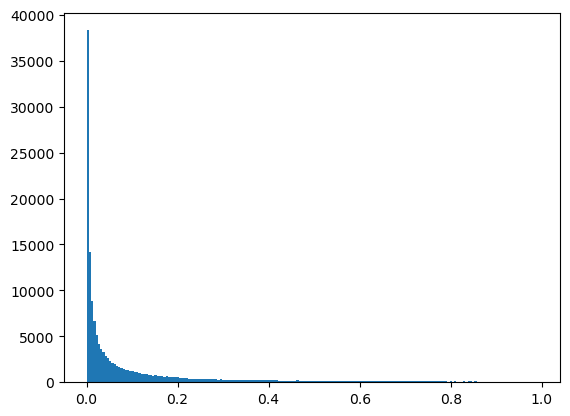

In [38]:
plt.hist(out_3.prob, bins=200)

In [39]:
out_3[out_3.prob>0.95]

,molecule,species,model,prob
2841,COC(=O)C12CCC(C)(C)CC1C1=CCC3C4(C)CC(O)C(O)C(C...,Eucalyptus risdoni,both_known,0.952163
5450,CCC=CCC=CCC=CCCCCCCCC(=O)O,Eucalyptus risdoni,both_known,0.951932
5729,CCC(C=CC(C)C1CCC2C3C(=O)C=C4CC(O)CCC4(C)C3CCC1...,Eucalyptus risdoni,both_known,0.981277
5776,O=C(O)CCCCCCCC=CC=CC=CCCCCO,Eucalyptus risdoni,both_known,0.967726
7947,CCCCCC=CCC=CCCCCCCCC(=O)OC,Eucalyptus risdoni,both_known,0.954769
...,...,...,...,...
142786,CCCCCCCCC=CCCCCCCCC(=O)O,Eucalyptus risdoni,both_known,0.976300
143156,CCCCCCCCC#CCCCCCCCC(=O)O,Eucalyptus risdoni,both_known,0.950856
143324,CCCCCCCCCCCCCCCCCCCCCCCC(=O)O,Eucalyptus risdoni,both_known,0.969585
143877,C=CC(C)(O)CCC=C(C)COC1OC(CO)C(O)C(O)C1O,Eucalyptus risdoni,both_known,0.958273


In [ ]:
df = pd.read_csv("./data/230106_frozen_metadata.csv.gz",chunksize=100)

In [ ]:
len(df_agg.organism_name.unique()) * len(df_agg.structure_smiles_2D.unique())

In [ ]:
import itertools
ls = itertools.product(df_agg.organism_name.unique(), df_agg.structure_smiles_2D.unique())

In [ ]:
import csv

In [ ]:
df[df['structure_smiles_2D']=='OCC1OC(O)(CO)C(O)C(O)C1O'].values

In [ ]:
from itertools import combinations, product
import csv
crust = ['Thin Crust', 'Hand Tossed']
topping = ['Bacon', 'Pepperoni', 'Steak']
sauce = ['Tomato', 'BBQ', 'Ranch']


prod = product(crust, topping)
combine_list=[]
for c, t in prod:
    print(c, t, sep=', ')